# Bitcoin-Price-Prediction-Using-Twitter-Sentiment-Analysis

### Techncolobas Data Science Internship Major Project

 - Project shows that real-time Twitter data can be used to predict market movement of Bitcoin Price. 
 - The goal of this project is to prove whether Twitter data relating to cryptocurrencies can be utilized to develop advantageous crypto coin trading strategies. 
 - By way of supervised machine learning techniques, have outlined several machine learning pipelines with the objective of identifying cryptocurrency market movement. 
 - The prominent alternative currency ex- amined in this paper is Bitcoin (BTC). Our approach to cleaning data and applying supervised learning algorithms such as logistic regression, Decision Tree Classifier, and LDA leads to a final prediction accuracy exceeding 70%. 
 - In order to achieve this result, rigorous error analysis is employed in order to ensure that accurate inputs are utilized at each step of the model.

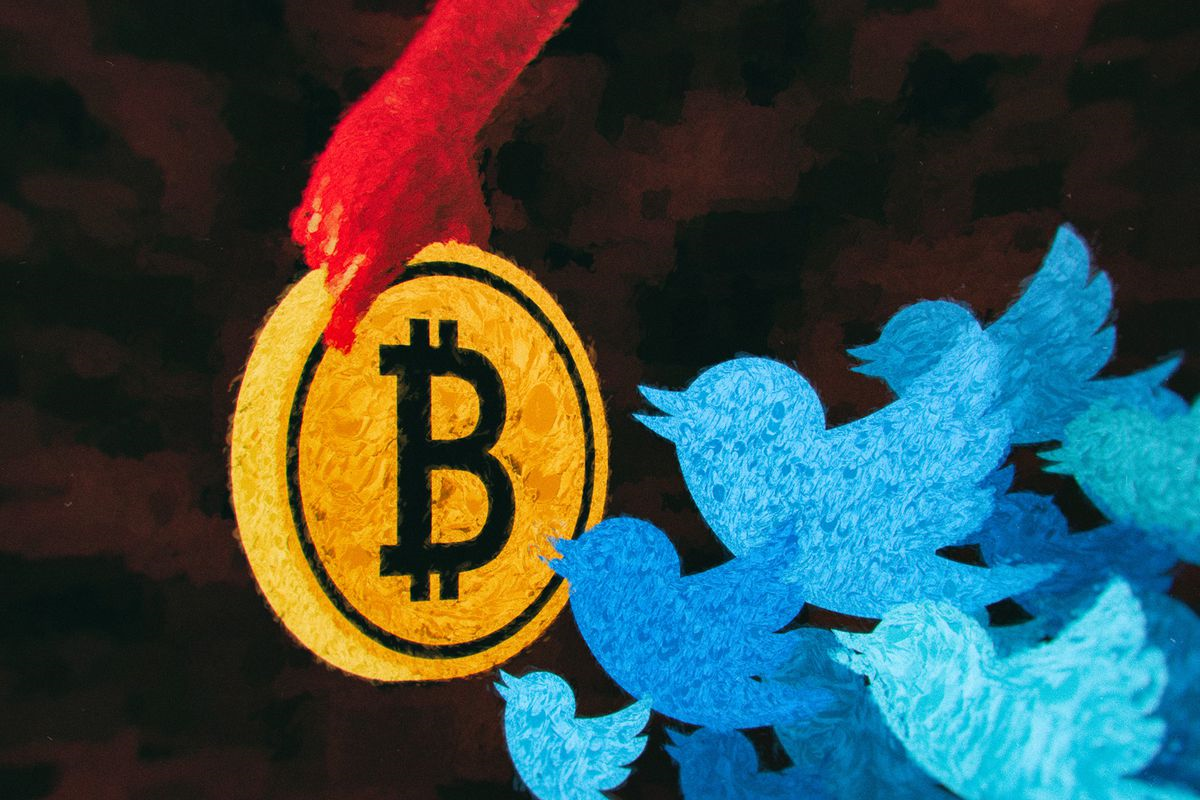

# Importing Libraries and Packages

In [ ]:
#pip install -q wordcloud
#pip install gensim
#!pip install vaderSentiment

In [1]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# Getting the Dataset

In [6]:
tweets = pd.read_csv('bitcointweetsscraping.csv')
tweets.head()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs
0,0,Who’s the punk holding $xvg back,32,1382003660746600451,2021-04-13 16:12:03,Twitter for iPhone,0,0
1,1,RT @Bitcoin: #Bitcoin is in the top-10 of the ...,94,1382003660197142532,2021-04-13 16:12:03,Twitter Web App,0,187
2,2,RT @cryptovenizo: $50 in 24hrs\n\n✓ RT this \n...,131,1382003659374878723,2021-04-13 16:12:03,Twitter for Android,0,1026
3,3,"RT @WSBChairman: Tesla is up ~$1,000,000,000 f...",78,1382003655717629954,2021-04-13 16:12:02,Twitter for iPhone,0,307
4,4,RT @steve_hanke: #BREAKING: #Bitcoin has surge...,139,1382003654547230720,2021-04-13 16:12:02,Twitter for iPhone,0,54


In [4]:
price = pd.read_csv('livebitcoindata.csv')
price.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-04-12 21:40:00+01:00,60225.453125,60225.453125,60215.382812,60220.113281,60220.113281,0
1,2021-04-12 21:45:00+01:00,60205.773438,60251.160156,60205.773438,60241.347656,60241.347656,0
2,2021-04-12 21:50:00+01:00,60247.441406,60247.441406,60236.179688,60238.906250,60238.906250,208896
3,2021-04-12 21:55:00+01:00,60232.863281,60233.667969,60156.992188,60156.992188,60156.992188,6852608
4,2021-04-12 22:00:00+01:00,60146.238281,60146.238281,60090.765625,60090.765625,60090.765625,0


# About the Data

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       100 non-null    int64 
 1   original_Tweets  100 non-null    object
 2   len              100 non-null    int64 
 3   ID               100 non-null    int64 
 4   Date             100 non-null    object
 5   Source           100 non-null    object
 6   Likes            100 non-null    int64 
 7   RTs              100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [8]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
tweets.shape

(100, 8)

In [10]:
price.shape

(253, 7)

In [11]:
tweets.isnull().sum().any()

False

In [12]:
price.isnull().sum().any()

False

#### No Null values in both datasets

In [13]:
tweets.describe()

,Unnamed: 0,len,ID,Likes,RTs
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,49.500000,126.070000,1.382004e+18,0.030000,505.410000
std,29.011492,54.173171,2.953802e+10,0.171447,1417.503953
min,0.000000,16.000000,1.382004e+18,0.000000,0.000000
25%,24.750000,99.750000,1.382004e+18,0.000000,0.000000
50%,49.500000,134.500000,1.382004e+18,0.000000,37.500000
75%,74.250000,140.000000,1.382004e+18,0.000000,355.000000
max,99.000000,350.000000,1.382004e+18,1.000000,11002.000000


#### Average length of any tweet is approx. 126
#### Maximum number of Re-Tweets are: 11002

In [14]:
price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,61568.303530,61619.686589,61528.803097,61581.153610,61581.153610,8.559996e+07
std,1257.431374,1270.183583,1250.495838,1265.164824,1265.164824,1.739079e+08
min,59890.019531,59944.964844,59869.957031,59892.859375,59892.859375,0.000000e+00
25%,60462.593750,60498.207031,60429.203125,60464.664062,60464.664062,0.000000e+00
50%,60953.371094,61013.878906,60890.460938,60959.257812,60959.257812,3.291136e+07
75%,62862.082031,62910.093750,62828.578125,62882.855469,62882.855469,1.091379e+08
max,63556.894531,63742.285156,63423.136719,63742.285156,63742.285156,1.664549e+09


# Cleaning of Tweets

In [15]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def contx_to_exp(text):
  for key in apostrophe_dict:
    value = apostrophe_dict[key]
    text = text.replace(key, value)
    return text

In [16]:
# Emotion detection by different symbols
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

def emotion_check(text):
  for key in emotion_dict:
    value = emotion_dict[key]
    text = text.replace(key, value)
    return text



In [17]:
def clean_text(text):
  text = re.sub(r'https?:\/\/\S*'," ", text) # Removing the url from the text
  text = re.sub(r'@\S+', " ", text) # Removing twitter handles from the text
  text = re.sub('#'," ", text) # removing # from the data
  text = re.sub(r'RT', "", text) # Removing the Re-tweet mark
  text = re.sub(r"\s+"," ", text)  # Removing Extra Spaces
  text = text.lower()
  return text

#removes pattern in the input text
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt.lower()

In [18]:
#removing the twitter handles @user
tweets['clean_tweet'] = np.vectorize(remove_pattern)(tweets['original_Tweets'], "@[\w]*")

#using above functions
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : clean_text(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : contx_to_exp(x))
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : emotion_check(x))

#removing special characters, numbers and punctuations
tweets['clean_tweet'] = tweets['clean_tweet'].str.replace("[^a-zA-Z]", " ")


#remove short words
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

# Removing every thing other than text
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^\w\s]',' ',x))  # Replacing Punctuations with space
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r'[^a-zA-Z]', ' ', x)) # Raplacing all the things with space other than text
tweets['clean_tweet'] = tweets['clean_tweet'].apply( lambda x: re.sub(r"\s+"," ", x)) # Removing extra spaces


#individual words as tokens
tokenized_tweet = tweets['clean_tweet'].apply(lambda x: x.split())


#stem the words

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])



#combine words into single sentence 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    

    
tweets['clean_tweet'] = tokenized_tweet
tweets.head()

,Unnamed: 0,original_Tweets,len,ID,Date,Source,Likes,RTs,clean_tweet
0,0,Who’s the punk holding $xvg back,32,1382003660746600451,2021-04-13 16:12:03,Twitter for iPhone,0,0,punk hold back
1,1,RT @Bitcoin: #Bitcoin is in the top-10 of the ...,94,1382003660197142532,2021-04-13 16:12:03,Twitter Web App,0,187,bitcoin world money suppli
2,2,RT @cryptovenizo: $50 in 24hrs\n\n✓ RT this \n...,131,1382003659374878723,2021-04-13 16:12:03,Twitter for Android,0,1026,thi follow sponsor giveaway like thi bitcoin
3,3,"RT @WSBChairman: Tesla is up ~$1,000,000,000 f...",78,1382003655717629954,2021-04-13 16:12:02,Twitter for iPhone,0,307,tesla from their invest bitcoin
4,4,RT @steve_hanke: #BREAKING: #Bitcoin has surge...,139,1382003654547230720,2021-04-13 16:12:02,Twitter for iPhone,0,54,break bitcoin surg past hour time high just re...


# Ading two dataframes

In [19]:
merge = pd.DataFrame(data=price[['Open','High','Low','Close','Volume']], columns=['Open','High','Low','Close','Volume'])
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 10.0 KB


In [20]:
merge['text'] = tweets['clean_tweet']
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    int64  
 5   text    100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 12.0+ KB


In [21]:
merge = merge.dropna(subset=['text'])
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   High    100 non-null    float64
 2   Low     100 non-null    float64
 3   Close   100 non-null    float64
 4   Volume  100 non-null    int64  
 5   text    100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.5+ KB


In [22]:
merge.head()

,Open,High,Low,Close,Volume,text
0,60225.453125,60225.453125,60215.382812,60220.113281,0,punk hold back
1,60205.773438,60251.160156,60205.773438,60241.347656,0,bitcoin world money suppli
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,thi follow sponsor giveaway like thi bitcoin
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,tesla from their invest bitcoin
4,60146.238281,60146.238281,60090.765625,60090.765625,0,break bitcoin surg past hour time high just re...


# Calculating Sentiment Polarity and Subjectivity

 - The subjectivity shows how subjective or objective a statement is.

 - The polarity shows how positive/negative the statement is, a value equal to 1 means the statement is positive, a value equal to 0 means the statement is neutral and a value of -1 means the statement is negative.

In [23]:
from textblob import TextBlob     # for performing NLP Functions i.e detection of Polarity and Subjectivity

polarity=[]     #list that contains polarity of tweets
subjectivity=[]    ##list that contains subjectivity of tweets

for i in merge.text.values:
    try:
        analysis = TextBlob(i) # [i] records to the first data in dataset
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)
        

        
# adding sentiment polarity and subjectivity column to dataframe

merge['polarity'] = polarity
merge['subjectivity'] = subjectivity
merge.head()

,Open,High,Low,Close,Volume,text,polarity,subjectivity
0,60225.453125,60225.453125,60215.382812,60220.113281,0,punk hold back,0.000,0.000
1,60205.773438,60251.160156,60205.773438,60241.347656,0,bitcoin world money suppli,0.000,0.000
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,thi follow sponsor giveaway like thi bitcoin,0.000,0.000
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,tesla from their invest bitcoin,0.000,0.000
4,60146.238281,60146.238281,60090.765625,60090.765625,0,break bitcoin surg past hour time high just re...,-0.045,0.395


#### To create a function t
 - to get sentiment scores (neg, pos, neu, & compound). 
 
##### The compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between 
 - -1(most extreme negative) and +1 (most extreme positive).

##### Pos is the positive percentage score, neg is the negative percentage score, and neu is the neutral percentage score.

#### The total for %pos + %neg + %neu = 100%

In [25]:
#Create a function to get the sentiment scores (using Sentiment Intensity Analyzer)
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [26]:
#Get the sentiment scores 
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(merge['text'])):
    SIA = getSIA(merge['text'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [27]:
#Store the sentiment scores in the data frame
merge['Compound'] =compound
merge['Negative'] =neg
merge['Neutral'] =neu
merge['Positive'] = pos

In [28]:
merge.head()

,Open,High,Low,Close,Volume,text,polarity,subjectivity,Compound,Negative,Neutral,Positive
0,60225.453125,60225.453125,60215.382812,60220.113281,0,punk hold back,0.000,0.000,0.0000,0.0,1.000,0.000
1,60205.773438,60251.160156,60205.773438,60241.347656,0,bitcoin world money suppli,0.000,0.000,0.0000,0.0,1.000,0.000
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,thi follow sponsor giveaway like thi bitcoin,0.000,0.000,0.3612,0.0,0.706,0.294
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,tesla from their invest bitcoin,0.000,0.000,0.0000,0.0,1.000,0.000
4,60146.238281,60146.238281,60090.765625,60090.765625,0,break bitcoin surg past hour time high just re...,-0.045,0.395,0.0000,0.0,1.000,0.000


In [29]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          100 non-null    float64
 1   High          100 non-null    float64
 2   Low           100 non-null    float64
 3   Close         100 non-null    float64
 4   Volume        100 non-null    int64  
 5   text          100 non-null    object 
 6   polarity      100 non-null    float64
 7   subjectivity  100 non-null    float64
 8   Compound      100 non-null    float64
 9   Negative      100 non-null    float64
 10  Neutral       100 non-null    float64
 11  Positive      100 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 15.2+ KB


# To find sentiments of tweets

In [30]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [31]:
# create a column to store the text sentiment
merge['tweet_sentiment'] = merge['polarity'].apply(getSentiment)
merge.head()

,Open,High,Low,Close,Volume,text,polarity,subjectivity,Compound,Negative,Neutral,Positive,tweet_sentiment
0,60225.453125,60225.453125,60215.382812,60220.113281,0,punk hold back,0.000,0.000,0.0000,0.0,1.000,0.000,neutral
1,60205.773438,60251.160156,60205.773438,60241.347656,0,bitcoin world money suppli,0.000,0.000,0.0000,0.0,1.000,0.000,neutral
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,thi follow sponsor giveaway like thi bitcoin,0.000,0.000,0.3612,0.0,0.706,0.294,neutral
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,tesla from their invest bitcoin,0.000,0.000,0.0000,0.0,1.000,0.000,neutral
4,60146.238281,60146.238281,60090.765625,60090.765625,0,break bitcoin surg past hour time high just re...,-0.045,0.395,0.0000,0.0,1.000,0.000,negative


In [32]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return 0 #negative
    elif score == 0:
        return 1  #neutral
    else:
        return 2 #positive

In [33]:
# create a column to store the text sentiment
merge['tweet_sentiment_flag'] = merge['polarity'].apply(getSentiment)
merge.head()

,Open,High,Low,Close,Volume,text,polarity,subjectivity,Compound,Negative,Neutral,Positive,tweet_sentiment,tweet_sentiment_flag
0,60225.453125,60225.453125,60215.382812,60220.113281,0,punk hold back,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1
1,60205.773438,60251.160156,60205.773438,60241.347656,0,bitcoin world money suppli,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,thi follow sponsor giveaway like thi bitcoin,0.000,0.000,0.3612,0.0,0.706,0.294,neutral,1
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,tesla from their invest bitcoin,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1
4,60146.238281,60146.238281,60090.765625,60090.765625,0,break bitcoin surg past hour time high just re...,-0.045,0.395,0.0000,0.0,1.000,0.000,negative,0


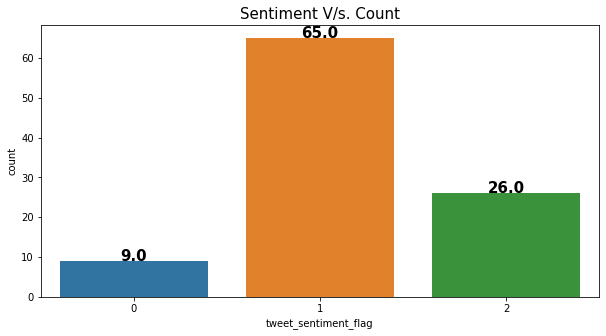

In [47]:
# inspect sentiment

plt.figure(figsize=[10,5])
sns.countplot(merge.tweet_sentiment_flag)
plt.title('Sentiment V/s. Count', fontsize=15)

label = (merge.tweet_sentiment_flag.value_counts(normalize=True)*100).round(2)
for i in range(3):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", 
             weight="bold", fontsize=15)
    
plt.legend

plt.show()

### Negative Sentimets Count = 9
### Neutral Sentimets Count = 65
### Positive Sentimets Count = 26

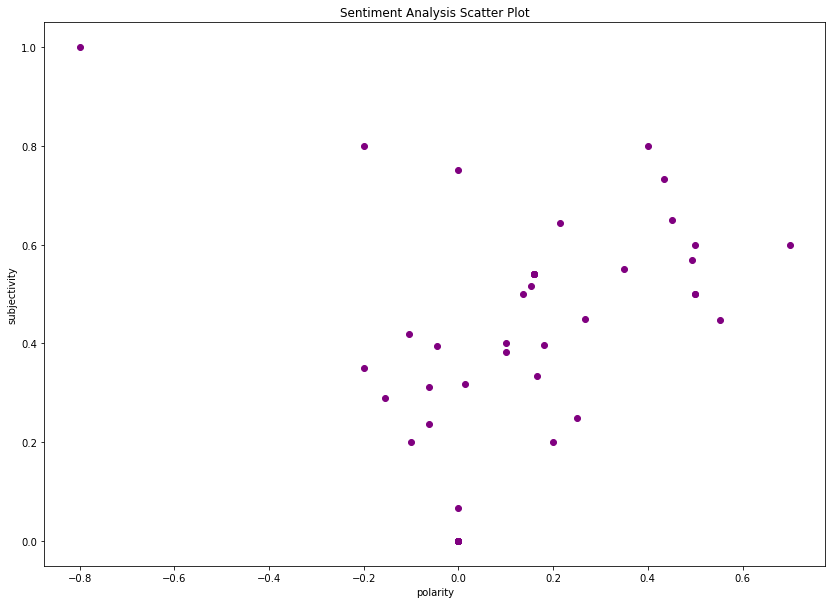

In [49]:
# scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(merge.shape[0]):
    plt.scatter(merge["polarity"].iloc[[i]].values[0], merge["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()


### As data is less but still can visulaise that more of the sentiments are tilted towrds positive with more opinion related tweets rather than factual

# Creating Target Column

 - Price Indicator
     - which will showcase the price in negative or positive in nature
     - price indicator negative = 'zero' value means price will go down
     - price indicator posiitve = 'one' value means price will go up

In [50]:
price_indicator = [merge.Close[0] - merge['Open'][0]]
for i in range(99):
    price_indicator.append(merge.Close[i+1] - merge.Close[i])
price_indicator

[-5.33984375,
 21.234375,
 -2.44140625,
 -81.9140625,
 -66.2265625,
 -27.24609375,
 9.0,
 -101.359375,
 2.28515625,
 -49.55859375,
 53.796875,
 73.41796875,
 34.97265625,
 -41.62890625,
 9.1171875,
 37.2421875,
 -87.66015625,
 -43.6875,
 16.67578125,
 -23.16796875,
 36.85546875,
 -11.7421875,
 22.26171875,
 -3.0078125,
 -51.8359375,
 42.640625,
 69.09375,
 32.12890625,
 -32.59765625,
 -1.5,
 59.6015625,
 -46.74609375,
 -65.05078125,
 -27.96484375,
 -16.9375,
 -1.2421875,
 -26.9453125,
 62.0078125,
 -19.109375,
 -79.421875,
 -0.59375,
 126.0703125,
 284.42578125,
 -85.41796875,
 23.21484375,
 54.80859375,
 -22.015625,
 11.5390625,
 138.69921875,
 -29.05078125,
 16.58203125,
 71.0,
 -41.578125,
 -52.484375,
 9.4375,
 -105.21484375,
 19.83203125,
 -34.09765625,
 79.37890625,
 92.84765625,
 42.84375,
 97.66796875,
 81.5703125,
 -32.9609375,
 11.77734375,
 -75.96484375,
 73.8359375,
 -83.47265625,
 39.26171875,
 48.921875,
 122.81640625,
 53.01953125,
 33.35546875,
 -34.19921875,
 -79.55859

In [51]:
merge['price_indicator'] = 0
for i in range(len(price_indicator)):
    merge['price_indicator'][i] = price_indicator[i]
    
merge.head()

,Open,High,Low,Close,Volume,text,polarity,subjectivity,Compound,Negative,Neutral,Positive,tweet_sentiment,tweet_sentiment_flag,price_indicator
0,60225.453125,60225.453125,60215.382812,60220.113281,0,punk hold back,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1,-5
1,60205.773438,60251.160156,60205.773438,60241.347656,0,bitcoin world money suppli,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1,21
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,thi follow sponsor giveaway like thi bitcoin,0.000,0.000,0.3612,0.0,0.706,0.294,neutral,1,-2
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,tesla from their invest bitcoin,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1,-81
4,60146.238281,60146.238281,60090.765625,60090.765625,0,break bitcoin surg past hour time high just re...,-0.045,0.395,0.0000,0.0,1.000,0.000,negative,0,-66


In [60]:
merge['target'] = 0
for i in range(100):
    if merge.price_indicator[i] > 0:
        merge['target'][i] = 1 
        
# 0 - price down
# 1 - price up

merge.head()

,Open,High,Low,Close,Volume,text,polarity,subjectivity,Compound,Negative,Neutral,Positive,tweet_sentiment,tweet_sentiment_flag,price_indicator,target
0,60225.453125,60225.453125,60215.382812,60220.113281,0,punk hold back,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1,-5,0
1,60205.773438,60251.160156,60205.773438,60241.347656,0,bitcoin world money suppli,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1,21,1
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,thi follow sponsor giveaway like thi bitcoin,0.000,0.000,0.3612,0.0,0.706,0.294,neutral,1,-2,0
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,tesla from their invest bitcoin,0.000,0.000,0.0000,0.0,1.000,0.000,neutral,1,-81,0
4,60146.238281,60146.238281,60090.765625,60090.765625,0,break bitcoin surg past hour time high just re...,-0.045,0.395,0.0000,0.0,1.000,0.000,negative,0,-66,0


In [61]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  100 non-null    float64
 1   High                  100 non-null    float64
 2   Low                   100 non-null    float64
 3   Close                 100 non-null    float64
 4   Volume                100 non-null    int64  
 5   text                  100 non-null    object 
 6   polarity              100 non-null    float64
 7   subjectivity          100 non-null    float64
 8   Compound              100 non-null    float64
 9   Negative              100 non-null    float64
 10  Neutral               100 non-null    float64
 11  Positive              100 non-null    float64
 12  tweet_sentiment       100 non-null    object 
 13  tweet_sentiment_flag  100 non-null    int64  
 14  price_indicator       100 non-null    int64  
 15  target                10

In [62]:
#Create a list of columns to keep in the completed data set and show the data.

keep_columns = ['Open','High','Low','Close','Volume','polarity','subjectivity','Compound','Negative','Neutral','Positive','target']
df = merge[keep_columns]
df.head()

,Open,High,Low,Close,Volume,polarity,subjectivity,Compound,Negative,Neutral,Positive,target
0,60225.453125,60225.453125,60215.382812,60220.113281,0,0.000,0.000,0.0000,0.0,1.000,0.000,0
1,60205.773438,60251.160156,60205.773438,60241.347656,0,0.000,0.000,0.0000,0.0,1.000,0.000,1
2,60247.441406,60247.441406,60236.179688,60238.906250,208896,0.000,0.000,0.3612,0.0,0.706,0.294,0
3,60232.863281,60233.667969,60156.992188,60156.992188,6852608,0.000,0.000,0.0000,0.0,1.000,0.000,0
4,60146.238281,60146.238281,60090.765625,60090.765625,0,-0.045,0.395,0.0000,0.0,1.000,0.000,0


# Model Building

In [63]:
#Create the feature data set
X = df
X = np.array(X.drop(['target'],1))
#Create the target data set
y = np.array(df['target'])

In [65]:
#Split the data into 80% training and 20% testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [66]:
X_train

array([[ 6.02932422e+04,  6.02932422e+04,  6.02086289e+04,
         6.02179375e+04,  2.48872960e+07,  2.66666667e-01,
         4.50000000e-01,  6.59000000e-01,  0.00000000e+00,
         4.81000000e-01,  5.19000000e-01],
       [ 6.05859688e+04,  6.06729180e+04,  6.05859688e+04,
         6.06729180e+04,  8.03143680e+07,  0.00000000e+00,
         0.00000000e+00,  3.61200000e-01,  0.00000000e+00,
         7.06000000e-01,  2.94000000e-01],
       [ 6.02328633e+04,  6.02336680e+04,  6.01569922e+04,
         6.01569922e+04,  6.85260800e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 6.07521367e+04,  6.08301523e+04,  6.07420508e+04,
         6.08301523e+04,  2.62881280e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 6.02252578e+04,  6.02959609e+04,  6.02178789e+04,
         6.02959609e+04,  0.00000000e+00,  0.00000000e+00,
  

# TPOT Classifier

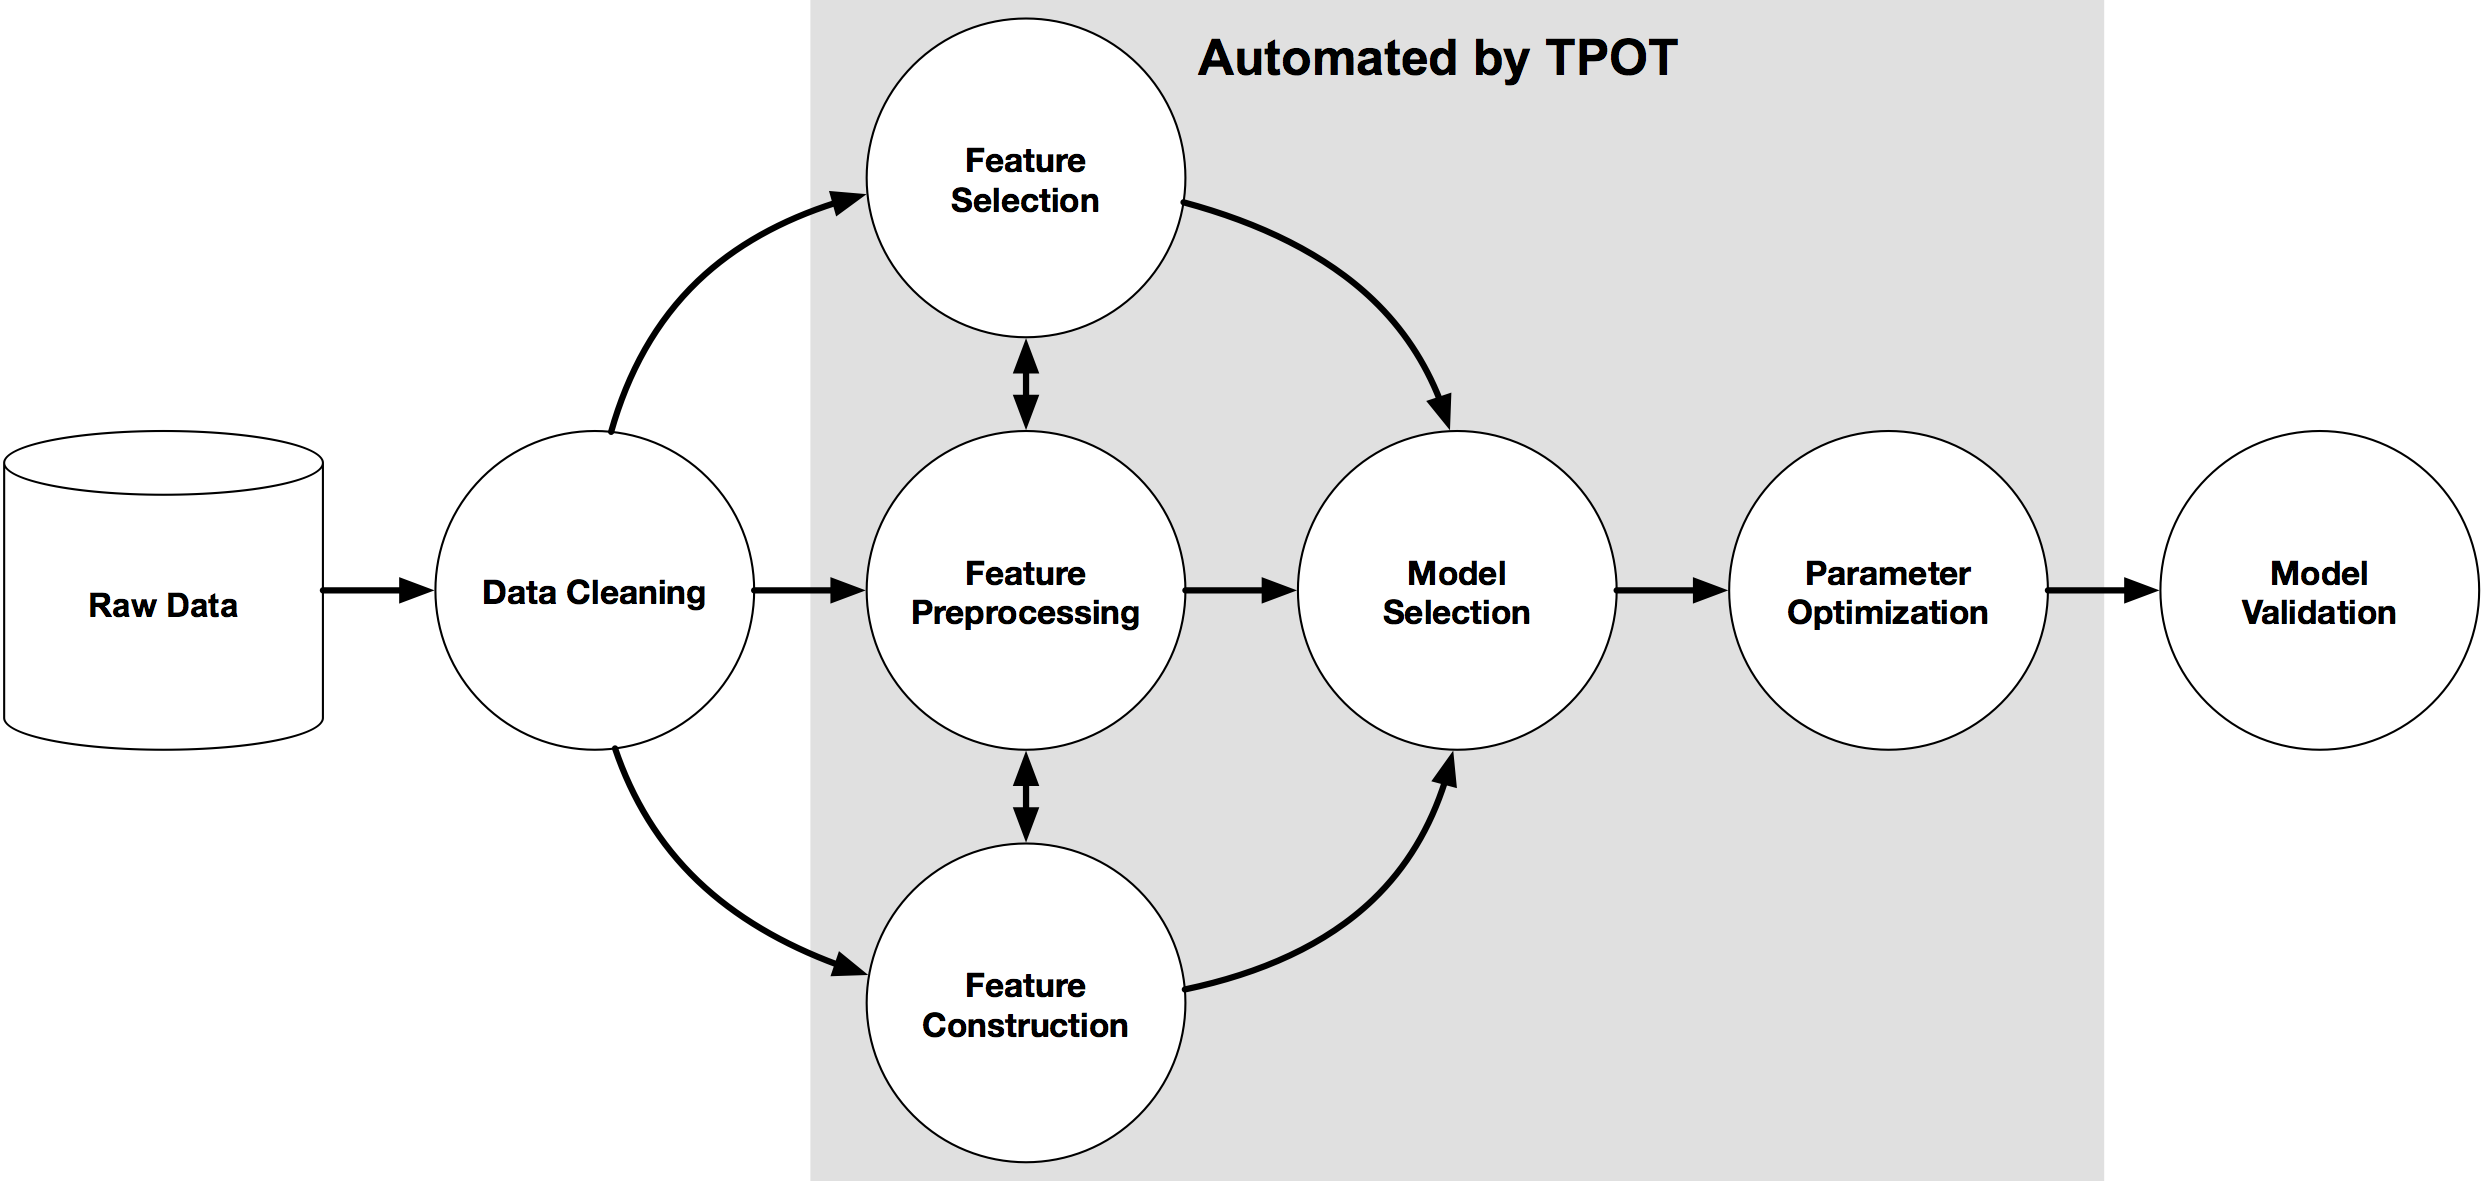

In [72]:
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [73]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5, #number of iterations to run ; pipeline optimisation process ; by default value is 100
    population_size=20, #number of individuals to retrain in the genetic programing popluation in every generation, by default value is 100
    verbosity=2, #it will state how much info TPOT will communicate while it is running
    scoring='roc_auc', #use to evaluate the quality of given pipeline
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.8625

Generation 2 - Current best internal CV score: 0.875

Generation 3 - Current best internal CV score: 0.875

Generation 4 - Current best internal CV score: 0.875

Generation 5 - Current best internal CV score: 0.8796875

Best pipeline: DecisionTreeClassifier(PCA(CombineDFs(input_matrix, input_matrix), iterated_power=3, svd_solver=randomized), criterion=entropy, max_depth=8, min_samples_leaf=10, min_samples_split=6)

AUC score: 0.8281

Best pipeline steps:
1. FeatureUnion(transformer_list=[('functiontransformer-1',
                                FunctionTransformer(func=<function copy at 0x000001EA8E656430>)),
                               ('functiontransformer-2',
                                FunctionTransformer(func=<function copy at 0x000001EA8E656430>))])
2. PCA(iterated_power=3, random_state=42, svd_solver='randomized')
3. DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       

In [74]:
tpot.fitted_pipeline_

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x000001EA8E656430>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x000001EA8E656430>))])),
                ('pca',
                 PCA(iterated_power=3, random_state=42,
                     svd_solver='randomized')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=10,
                                        min_samples_split=6,
                                        random_state=42))])

# Model 1: Decision tree classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=10,
                                        min_samples_split=6,
                                        random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=6, random_state=42)

In [77]:
y_predicted = clf.predict(X_test)

In [78]:
y_predicted

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [79]:
print( classification_report(y_test, y_predicted) )

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.44      0.50      0.47         8

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.56      0.55      0.55        20



In [81]:
accuracy_score(y_test,y_predicted)*100

55.00000000000001

#### Model is 55% accurate

## Creating Pipeline to see which model has more accuracy

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [88]:
pipeline_lr = Pipeline([('scaler1',StandardScaler()),
                       ('pca1',PCA(n_components=2)),
                       ('lr_classifier',LogisticRegression(random_state=0))])

In [89]:
pipeline_dt = Pipeline([('scaler2',StandardScaler()),
                       ('pca2',PCA(n_components=2)),
                       ('dt_classifier',DecisionTreeClassifier())])

In [90]:
pipeline_randomforest = Pipeline([('scaler3',StandardScaler()),
                       ('pca3',PCA(n_components=2)),
                       ('rf_classifier',RandomForestClassifier())])

In [92]:
pipeline = [pipeline_lr,pipeline_dt,pipeline_randomforest]

In [93]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [94]:
pipe_dict = {0:'Logistic Regression', 1:'Decision Tree', 2:'RandomForest'}

for pipe in pipeline:
    pipe.fit(X_train,y_train)
    

In [95]:
for i,model in enumerate(pipeline):
    print("{}Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic RegressionTest Accuracy: 0.5
Decision TreeTest Accuracy: 0.35
RandomForestTest Accuracy: 0.3


# Model 2: LDA

In [96]:
model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [97]:
#Get the models predictions/classification
predictions = model.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [98]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.58      0.88      0.70         8

    accuracy                           0.70        20
   macro avg       0.73      0.73      0.70        20
weighted avg       0.76      0.70      0.70        20



In [99]:
accuracy_score(y_test,predictions)*100

70.0

#### Model is 70% accurate

In [100]:
X_test

array([[ 6.00269258e+04,  6.00775508e+04,  6.00269258e+04,
         6.00572305e+04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.72000000e-02,  0.00000000e+00,
         8.85000000e-01,  1.15000000e-01],
       [ 6.05703516e+04,  6.05703516e+04,  6.05004141e+04,
         6.05224805e+04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 6.02474414e+04,  6.02474414e+04,  6.02361797e+04,
         6.02389062e+04,  2.08896000e+05,  0.00000000e+00,
         0.00000000e+00,  3.61200000e-01,  0.00000000e+00,
         7.06000000e-01,  2.94000000e-01],
       [ 6.03984141e+04,  6.03984141e+04,  6.02928750e+04,
         6.02928750e+04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.61200000e-01,  0.00000000e+00,
         7.06000000e-01,  2.94000000e-01],
       [ 6.07686016e+04,  6.08396680e+04,  6.07686016e+04,
         6.08396680e+04,  8.84244480e+07,  5.53333333e-01,
  

In [102]:
import pickle

# Saving model to disk
pickle.dump(model, open('bitcoin.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('bitcoin.pkl', 'rb'))
print(model.predict([[ 6.00269258e+04,  6.00775508e+04,  6.00269258e+04,
         6.00572305e+04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.72000000e-02,  0.00000000e+00,
         8.85000000e-01,  1.15000000e-01]]))

[1]
